# keras LSTM

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
BATCH_START = 0

TIME_STEPS = 20
BATCH_SIZE = 50

INPUT_SIZE = 1
OUTPUT_SIZE = 1

CELL_SIZE = 20  # lstm神经元中的hidden_unit

LR = 0.006

In [3]:
def get_batch():
    global BATCH_START, TIME_STEPS
#     BATCH_START=0
#     TIME_STEPS=500
    
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
#     plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
#     plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

# get_batch()

In [4]:
model = Sequential()

## build a LSTM RNN

In [5]:
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2（每个batch的state串联输入）
))

Instructions for updating:
Colocations handled automatically by placer.


D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  """


## add output layer

In [6]:
# 加入TimeDistributed，Dense全连接接层对每个输出进行连接（每个时刻），所以使用TimeDistributed函数。
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))

In [7]:
adam = Adam(LR)

model.compile(
    optimizer=adam,
    loss='mse',
)

## Train

Training ------------

Instructions for updating:
Use tf.cast instead.
train cost:  0.5094064
train cost:  0.36354724
train cost:  0.062364124


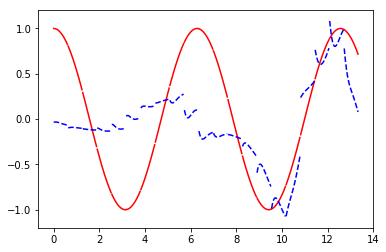

In [8]:
print('Training ------------\n')
for step in range(21):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    if step % 10 == 0:
        print('train cost: ', cost)
plt.show()


## 模型结构输出

In [10]:
from keras.utils import plot_model

plot_model(model, to_file='../pic/lstm_model.png', show_shapes=True, show_layer_names=True)